# Wrangle and Analyze Data
### by Eslam Saleh

## Gather
Depending on the source of your data, and what format it's in, the steps in gathering data vary.
High-level gathering process: obtaining data (downloading a file from the internet, scraping a web page, querying an API, etc.) and importing that data into your programming environment (e.g., Jupyter Notebook).
## Assess
#### Assess data for:

Quality: issues with content. Low quality data is also known as dirty data.
Tidiness: issues with structure that prevent easy analysis. Untidy data is also known as messy data. Tidy data requirements:
Each variable forms a column.
Each observation forms a row.
Each type of observational unit forms a table.
##### Types of assessment:

Visual assessment: scrolling through the data in your preferred software application (Google Sheets, Excel, a text editor, etc.).
Programmatic assessment: using code to view specific portions and summaries of the data (pandas' head, tail, and info methods, for example).
Clean
Types of cleaning:Manual (not recommended unless the issues are single occurrences)
##### Programmatic
The programmatic data cleaning process:
Define: convert our assessments into defined cleaning tasks. These definitions also serve as an instruction list so others (or yourself in the future) can look at your work and reproduce it.
Code: convert those definitions to code and run that code.
Test: test your dataset, visually or with code, to make sure your cleaning operations worked.

# Gathering Data

- gathering data from twitter-archive-enhanced.csv
- download programmatically from URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv
- query the Twitter API for each tweet's JSON data using Python's Tweepy library 


In [1]:
import pandas as pd 
import numpy as np
import tweepy 
import time
import requests
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [4]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [5]:
## download programmatically from URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r=requests.get(url)
with open('image-predictions.tsv','wb') as f:
    f.write(r.content)
  


In [6]:
ip=pd.read_csv('image-predictions.tsv',sep='\t')

In [7]:
ip.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [8]:
### Tweepy  
#https://realpython.com/twitter-bot-python-tweepy/
#http://docs.tweepy.org/en/latest/api.html
# Auth to Twitter
consumer_key='QxZvPDdszap2wuBVt5fFoqHVJ'
consumer_secret='aaqfQjCHz7j4hN9Ke1jWRpB15UVNcPHV3UzSHV3Qi91nebw189'
access_token='1330259629511675908-LkaV6O37C1eefxHQpsbmYqp8bEDOyA'
access_secret='jCrbLCUzzmouV5dtLfxRWgOw6v40uvScnEmnQrQxbcOC6'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api= tweepy.API(auth_handler = auth,parser = tweepy.parsers.JSONParser(),wait_on_rate_limit = True,wait_on_rate_limit_notify = True)


In [9]:
#http://docs.tweepy.org/en/latest/extended_tweets.html
Tweets=[]
error_tweets=[]


for tweet_id in df['tweet_id']:
    try:
       
        tweet = api.get_status(tweet_id, tweet_mode='extended')
        Tweets.append(tweet)
        print('ID : '+str(tweet_id)+'   Test:PASSED')
    except:
        error_tweets.append(tweet_id)
        
        print('ID :' + str(tweet_id)+'    Test:ERROR' )
print('-------------------------------------------------------------------------------------------------------------------')


ID : 892420643555336193   Test:PASSED
ID : 892177421306343426   Test:PASSED
ID : 891815181378084864   Test:PASSED
ID : 891689557279858688   Test:PASSED
ID : 891327558926688256   Test:PASSED
ID : 891087950875897856   Test:PASSED
ID : 890971913173991426   Test:PASSED
ID : 890729181411237888   Test:PASSED
ID : 890609185150312448   Test:PASSED
ID : 890240255349198849   Test:PASSED
ID : 890006608113172480   Test:PASSED
ID : 889880896479866881   Test:PASSED
ID : 889665388333682689   Test:PASSED
ID : 889638837579907072   Test:PASSED
ID : 889531135344209921   Test:PASSED
ID : 889278841981685760   Test:PASSED
ID : 888917238123831296   Test:PASSED
ID : 888804989199671297   Test:PASSED
ID : 888554962724278272   Test:PASSED
ID :888202515573088257    Test:ERROR
ID : 888078434458587136   Test:PASSED
ID : 887705289381826560   Test:PASSED
ID : 887517139158093824   Test:PASSED
ID : 887473957103951883   Test:PASSED
ID : 887343217045368832   Test:PASSED
ID : 887101392804085760   Test:PASSED
ID : 88698323

ID : 850753642995093505   Test:PASSED
ID : 850380195714523136   Test:PASSED
ID : 850333567704068097   Test:PASSED
ID : 850145622816686080   Test:PASSED
ID : 850019790995546112   Test:PASSED
ID : 849776966551130114   Test:PASSED
ID : 849668094696017920   Test:PASSED
ID : 849412302885593088   Test:PASSED
ID : 849336543269576704   Test:PASSED
ID : 849051919805034497   Test:PASSED
ID : 848690551926992896   Test:PASSED
ID : 848324959059550208   Test:PASSED
ID : 848213670039564288   Test:PASSED
ID : 848212111729840128   Test:PASSED
ID : 847978865427394560   Test:PASSED
ID : 847971574464610304   Test:PASSED
ID : 847962785489326080   Test:PASSED
ID : 847842811428974592   Test:PASSED
ID : 847617282490613760   Test:PASSED
ID : 847606175596138505   Test:PASSED
ID : 847251039262605312   Test:PASSED
ID : 847157206088847362   Test:PASSED
ID : 847116187444137987   Test:PASSED
ID : 846874817362120707   Test:PASSED
ID : 846514051647705089   Test:PASSED
ID : 846505985330044928   Test:PASSED
ID : 8461537

ID : 820749716845686786   Test:PASSED
ID : 820690176645140481   Test:PASSED
ID : 820494788566847489   Test:PASSED
ID : 820446719150292993   Test:PASSED
ID : 820314633777061888   Test:PASSED
ID : 820078625395449857   Test:PASSED
ID : 820013781606658049   Test:PASSED
ID : 819952236453363712   Test:PASSED
ID : 819924195358416896   Test:PASSED
ID : 819711362133872643   Test:PASSED
ID : 819588359383371776   Test:PASSED
ID : 819347104292290561   Test:PASSED
ID : 819238181065359361   Test:PASSED
ID : 819227688460238848   Test:PASSED
ID : 819015337530290176   Test:PASSED
ID : 819015331746349057   Test:PASSED
ID : 819006400881917954   Test:PASSED
ID : 819004803107983360   Test:PASSED
ID : 818646164899774465   Test:PASSED
ID : 818627210458333184   Test:PASSED
ID : 818614493328580609   Test:PASSED
ID : 818588835076603904   Test:PASSED
ID : 818536468981415936   Test:PASSED
ID : 818307523543449600   Test:PASSED
ID : 818259473185828864   Test:PASSED
ID : 818145370475810820   Test:PASSED
ID : 8179089

ID : 793120401413079041   Test:PASSED
ID : 792913359805018113   Test:PASSED
ID : 792883833364439040   Test:PASSED
ID : 792773781206999040   Test:PASSED
ID : 792394556390137856   Test:PASSED
ID : 792050063153438720   Test:PASSED
ID : 791821351946420224   Test:PASSED
ID : 791784077045166082   Test:PASSED
ID : 791780927877898241   Test:PASSED
ID : 791774931465953280   Test:PASSED
ID : 791672322847637504   Test:PASSED
ID : 791406955684368384   Test:PASSED
ID : 791312159183634433   Test:PASSED
ID : 791026214425268224   Test:PASSED
ID : 790987426131050500   Test:PASSED
ID : 790946055508652032   Test:PASSED
ID : 790723298204217344   Test:PASSED
ID : 790698755171364864   Test:PASSED
ID : 790581949425475584   Test:PASSED
ID : 790337589677002753   Test:PASSED
ID : 790277117346975746   Test:PASSED
ID : 790227638568808452   Test:PASSED
ID : 789986466051088384   Test:PASSED
ID : 789960241177853952   Test:PASSED
ID : 789903600034189313   Test:PASSED
ID : 789628658055020548   Test:PASSED
ID : 7895992

ID : 762464539388485633   Test:PASSED
ID : 762316489655476224   Test:PASSED
ID : 762035686371364864   Test:PASSED
ID : 761976711479193600   Test:PASSED
ID : 761750502866649088   Test:PASSED
ID : 761745352076779520   Test:PASSED
ID : 761672994376806400   Test:PASSED
ID : 761599872357261312   Test:PASSED
ID : 761371037149827077   Test:PASSED
ID : 761334018830917632   Test:PASSED
ID : 761292947749015552   Test:PASSED
ID : 761227390836215808   Test:PASSED
ID : 761004547850530816   Test:PASSED
ID : 760893934457552897   Test:PASSED
ID : 760656994973933572   Test:PASSED
ID : 760641137271070720   Test:PASSED
ID : 760539183865880579   Test:PASSED
ID : 760521673607086080   Test:PASSED
ID : 760290219849637889   Test:PASSED
ID : 760252756032651264   Test:PASSED
ID : 760190180481531904   Test:PASSED
ID : 760153949710192640   Test:PASSED
ID : 759943073749200896   Test:PASSED
ID : 759923798737051648   Test:PASSED
ID : 759846353224826880   Test:PASSED
ID : 759793422261743616   Test:PASSED
ID :75956682

Rate limit reached. Sleeping for: 38


ID : 758474966123810816   Test:PASSED
ID : 758467244762497024   Test:PASSED
ID : 758405701903519748   Test:PASSED
ID : 758355060040593408   Test:PASSED
ID : 758099635764359168   Test:PASSED
ID :758041019896193024    Test:ERROR
ID : 757741869644341248   Test:PASSED
ID : 757729163776290825   Test:PASSED
ID : 757725642876129280   Test:PASSED
ID : 757611664640446465   Test:PASSED
ID : 757597904299253760   Test:PASSED
ID : 757596066325864448   Test:PASSED
ID : 757400162377592832   Test:PASSED
ID : 757393109802180609   Test:PASSED
ID : 757354760399941633   Test:PASSED
ID : 756998049151549440   Test:PASSED
ID : 756939218950160384   Test:PASSED
ID : 756651752796094464   Test:PASSED
ID : 756526248105566208   Test:PASSED
ID : 756303284449767430   Test:PASSED
ID : 756288534030475264   Test:PASSED
ID : 756275833623502848   Test:PASSED
ID : 755955933503782912   Test:PASSED
ID : 755206590534418437   Test:PASSED
ID : 755110668769038337   Test:PASSED
ID : 754874841593970688   Test:PASSED
ID : 75485658

ID : 732375214819057664   Test:PASSED
ID : 732005617171337216   Test:PASSED
ID : 731285275100512256   Test:PASSED
ID : 731156023742988288   Test:PASSED
ID : 730924654643314689   Test:PASSED
ID : 730573383004487680   Test:PASSED
ID : 730427201120833536   Test:PASSED
ID : 730211855403241472   Test:PASSED
ID : 730196704625098752   Test:PASSED
ID : 729854734790754305   Test:PASSED
ID : 729838605770891264   Test:PASSED
ID : 729823566028484608   Test:PASSED
ID : 729463711119904772   Test:PASSED
ID : 729113531270991872   Test:PASSED
ID : 728986383096946689   Test:PASSED
ID : 728760639972315136   Test:PASSED
ID : 728751179681943552   Test:PASSED
ID : 728653952833728512   Test:PASSED
ID : 728409960103686147   Test:PASSED
ID : 728387165835677696   Test:PASSED
ID : 728046963732717569   Test:PASSED
ID : 728035342121635841   Test:PASSED
ID : 728015554473250816   Test:PASSED
ID : 727685679342333952   Test:PASSED
ID : 727644517743104000   Test:PASSED
ID : 727524757080539137   Test:PASSED
ID : 7273144

ID : 705442520700944385   Test:PASSED
ID : 705428427625635840   Test:PASSED
ID : 705239209544720384   Test:PASSED
ID : 705223444686888960   Test:PASSED
ID : 705102439679201280   Test:PASSED
ID : 705066031337840642   Test:PASSED
ID : 704871453724954624   Test:PASSED
ID : 704859558691414016   Test:PASSED
ID : 704847917308362754   Test:PASSED
ID : 704819833553219584   Test:PASSED
ID : 704761120771465216   Test:PASSED
ID : 704499785726889984   Test:PASSED
ID : 704491224099647488   Test:PASSED
ID : 704480331685040129   Test:PASSED
ID : 704364645503647744   Test:PASSED
ID : 704347321748819968   Test:PASSED
ID : 704134088924532736   Test:PASSED
ID : 704113298707505153   Test:PASSED
ID : 704054845121142784   Test:PASSED
ID : 703774238772166656   Test:PASSED
ID : 703769065844768768   Test:PASSED
ID : 703631701117943808   Test:PASSED
ID : 703611486317502464   Test:PASSED
ID : 703425003149250560   Test:PASSED
ID : 703407252292673536   Test:PASSED
ID : 703382836347330562   Test:PASSED
ID : 7033563

ID : 689255633275777024   Test:PASSED
ID : 689154315265683456   Test:PASSED
ID : 689143371370250240   Test:PASSED
ID : 688916208532455424   Test:PASSED
ID : 688908934925697024   Test:PASSED
ID : 688898160958271489   Test:PASSED
ID : 688894073864884227   Test:PASSED
ID : 688828561667567616   Test:PASSED
ID : 688804835492233216   Test:PASSED
ID : 688789766343622656   Test:PASSED
ID : 688547210804498433   Test:PASSED
ID : 688519176466644993   Test:PASSED
ID : 688385280030670848   Test:PASSED
ID : 688211956440801280   Test:PASSED
ID : 688179443353796608   Test:PASSED
ID : 688116655151435777   Test:PASSED
ID : 688064179421470721   Test:PASSED
ID : 687841446767013888   Test:PASSED
ID : 687826841265172480   Test:PASSED
ID : 687818504314159109   Test:PASSED
ID : 687807801670897665   Test:PASSED
ID : 687732144991551489   Test:PASSED
ID : 687704180304273409   Test:PASSED
ID : 687664829264453632   Test:PASSED
ID : 687494652870668288   Test:PASSED
ID : 687480748861947905   Test:PASSED
ID : 6874762

ID : 678410210315247616   Test:PASSED
ID : 678399652199309312   Test:PASSED
ID : 678396796259975168   Test:PASSED
ID : 678389028614488064   Test:PASSED
ID : 678380236862578688   Test:PASSED
ID : 678341075375947776   Test:PASSED
ID : 678334497360859136   Test:PASSED
ID : 678278586130948096   Test:PASSED
ID : 678255464182861824   Test:PASSED
ID : 678023323247357953   Test:PASSED
ID : 678021115718029313   Test:PASSED
ID : 677961670166224897   Test:PASSED
ID : 677918531514703872   Test:PASSED
ID : 677895101218201600   Test:PASSED
ID : 677716515794329600   Test:PASSED
ID : 677700003327029250   Test:PASSED
ID : 677698403548192770   Test:PASSED
ID : 677687604918272002   Test:PASSED
ID : 677673981332312066   Test:PASSED
ID : 677662372920729601   Test:PASSED
ID : 677644091929329666   Test:PASSED
ID : 677573743309385728   Test:PASSED
ID : 677565715327688705   Test:PASSED
ID : 677557565589463040   Test:PASSED
ID : 677547928504967168   Test:PASSED
ID : 677530072887205888   Test:PASSED
ID : 6773357

ID : 672970152493887488   Test:PASSED
ID : 672968025906282496   Test:PASSED
ID : 672964561327235073   Test:PASSED
ID : 672902681409806336   Test:PASSED
ID : 672898206762672129   Test:PASSED
ID : 672884426393653248   Test:PASSED
ID : 672877615439593473   Test:PASSED
ID : 672834301050937345   Test:PASSED
ID : 672828477930868736   Test:PASSED
ID : 672640509974827008   Test:PASSED
ID : 672622327801233409   Test:PASSED
ID : 672614745925664768   Test:PASSED
ID : 672609152938721280   Test:PASSED
ID : 672604026190569472   Test:PASSED
ID : 672594978741354496   Test:PASSED
ID : 672591762242805761   Test:PASSED
ID : 672591271085670400   Test:PASSED
ID : 672538107540070400   Test:PASSED
ID : 672523490734551040   Test:PASSED
ID : 672488522314567680   Test:PASSED
ID : 672482722825261057   Test:PASSED
ID : 672481316919734272   Test:PASSED
ID : 672475084225949696   Test:PASSED
ID : 672466075045466113   Test:PASSED
ID : 672272411274932228   Test:PASSED
ID :672267570918129665    Test:ERROR
ID : 67226425

ID : 668826086256599040   Test:PASSED
ID : 668815180734689280   Test:PASSED
ID : 668779399630725120   Test:PASSED
ID : 668655139528511488   Test:PASSED
ID : 668645506898350081   Test:PASSED
ID : 668643542311546881   Test:PASSED
ID : 668641109086707712   Test:PASSED
ID : 668636665813057536   Test:PASSED
ID : 668633411083464705   Test:PASSED
ID : 668631377374486528   Test:PASSED
ID : 668627278264475648   Test:PASSED
ID : 668625577880875008   Test:PASSED
ID : 668623201287675904   Test:PASSED
ID : 668620235289837568   Test:PASSED
ID : 668614819948453888   Test:PASSED
ID : 668587383441514497   Test:PASSED
ID : 668567822092664832   Test:PASSED
ID : 668544745690562560   Test:PASSED
ID : 668542336805281792   Test:PASSED
ID : 668537837512433665   Test:PASSED
ID : 668528771708952576   Test:PASSED
ID : 668507509523615744   Test:PASSED
ID : 668496999348633600   Test:PASSED
ID : 668484198282485761   Test:PASSED
ID : 668480044826800133   Test:PASSED
ID : 668466899341221888   Test:PASSED
ID : 6682973

In [10]:
len(Tweets)

2319

In [11]:
error_tweets

[888202515573088257,
 873697596434513921,
 872668790621863937,
 872261713294495745,
 869988702071779329,
 866816280283807744,
 861769973181624320,
 856602993587888130,
 851953902622658560,
 845459076796616705,
 844704788403113984,
 842892208864923648,
 837366284874571778,
 837012587749474308,
 829374341691346946,
 827228250799742977,
 812747805718642688,
 812709060537683968,
 802247111496568832,
 779123168116150273,
 775096608509886464,
 771004394259247104,
 770743923962707968,
 759566828574212096,
 758041019896193024,
 754011816964026368,
 752701944171524096,
 746906459439529985,
 708479650088034305,
 707629649552134146,
 697259378236399616,
 680055455951884288,
 672267570918129665,
 670826280409919488,
 669353438988365824,
 667782464991965184,
 666104133288665088]

In [12]:
len(error_tweets)

37

In [13]:
error=[]
for tweet_id in error_tweets:
    try:
       
        tweet = api.get_status(tweet_id, tweet_mode='extended')
        Tweets.append(tweet)
        print('ID : '+str(tweet_id)+'   Test:PASSED')
    except:
        error.append(tweet_id)
        
        print('ID :' + str(tweet_id)+'    Test:ERROR' )
print('-------------------------------------------------------------------------------------------------------------------')


ID :888202515573088257    Test:ERROR
ID :873697596434513921    Test:ERROR
ID :872668790621863937    Test:ERROR
ID :872261713294495745    Test:ERROR
ID :869988702071779329    Test:ERROR
ID :866816280283807744    Test:ERROR
ID :861769973181624320    Test:ERROR
ID :856602993587888130    Test:ERROR
ID :851953902622658560    Test:ERROR
ID :845459076796616705    Test:ERROR
ID :844704788403113984    Test:ERROR
ID :842892208864923648    Test:ERROR
ID :837366284874571778    Test:ERROR
ID :837012587749474308    Test:ERROR
ID :829374341691346946    Test:ERROR
ID :827228250799742977    Test:ERROR
ID :812747805718642688    Test:ERROR
ID : 812709060537683968   Test:PASSED
ID :802247111496568832    Test:ERROR
ID :779123168116150273    Test:ERROR
ID :775096608509886464    Test:ERROR
ID :771004394259247104    Test:ERROR
ID :770743923962707968    Test:ERROR
ID :759566828574212096    Test:ERROR
ID : 758041019896193024   Test:PASSED
ID :754011816964026368    Test:ERROR
ID : 752701944171524096   Test:PASSE

In [14]:
len(error)

25

In [15]:
#https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/
# storing data as tweet_json.txt
with open('tweet_json.txt', 'w') as f:
    json.dump(Tweets, f)
    


In [16]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_json.html
tweet_df=pd.read_json('tweet_json.txt')
tweet_df.info()
#tweet_df=tweet_df.T  #### Transpose 
#tweet_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2331 non-null datetime64[ns]
display_text_range               2331 non-null object
entities                         2331 non-null object
extended_entities                2059 non-null object
favorite_count                   2331 non-null int64
favorited                        2331 non-null bool
full_text                        2331 non-null object
geo                              0 non-null float64
id                               2331 non-null int64
id_str                           2331 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 n

In [17]:
dfjson = pd.DataFrame(tweet_df, columns = ['id', 'favorite_count', 'retweet_count'])
dfjson.head()

,id,favorite_count,retweet_count
0,892420643555336193,35390,7477
1,892177421306343426,30639,5548
2,891815181378084864,23033,3671
3,891689557279858688,38686,7649
4,891327558926688256,36969,8250


In [18]:
dfjson.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
id                2331 non-null int64
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


## Assessing Data for this Project

 * Detect and document at least eight (8) quality issues and two (2) tidiness issues

In [19]:
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [20]:
ip

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [21]:
dfjson

,id,favorite_count,retweet_count
0,892420643555336193,35390,7477
1,892177421306343426,30639,5548
2,891815181378084864,23033,3671
3,891689557279858688,38686,7649
4,891327558926688256,36969,8250
5,891087950875897856,18634,2759
6,890971913173991426,10828,1792
7,890729181411237888,59632,16726
8,890609185150312448,25648,3815
9,890240255349198849,29261,6489


In [22]:
sum(df.duplicated())

0

In [23]:
sum(ip.duplicated())

0

In [24]:
sum(dfjson.duplicated())   ## Quality 1 duplicates in dfjson

0

In [25]:
sum(ip.jpg_url.duplicated()) ## Quality 2

66

In [26]:
df.info() # quality 3 fix type in columns  in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id
#Tidiness 1 doggo, floofer, pupper and puppo columns to be in one column
#Quality 4 source column has HTML
# Tidiness 2 name of column id in table dfjson need to change to tweet_id
# quality 5 rating_denominator should all to be 10
# quality 6 timestamp to datetime
# quality 7 null values
# quality 8 rating= rating_numerator/rating_denominator
# quality 9 types of tweet id should be object not int 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [27]:
ip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [28]:
dfjson.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
id                2331 non-null int64
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


## Quality 


* duplicates in dfjson (tweet_json)
* duplicates in ip.jpg_url (image)
* fix type in columns  in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id
* source column has HTML
* rating_denominator should all to be 10
* timestamp to datetime
* null values
* rating= rating_numerator/rating_denominator
* types of tweet id should be object not int 
* delect unneeded columns
* select two types of dogs at same stage
* p1 p2 p3 lower cases
* p1 p2 p3 space with _


## Tidiness 

* doggo, floofer, pupper and puppo columns to be in one column
* each observation forms a row, each type of observational unit forms a table
* All tables should be part of one dataset

In [29]:
df_clean=df.copy()

In [30]:
ip_clean=ip.copy()

In [31]:
dfjson_clean=dfjson.copy()

##### define

* Remove duplicates in dfjson (tweet_json)

##### Code and Test

In [32]:
#https://www.geeksforgeeks.org/python-pandas-dataframe-drop_duplicates/
dfjson_clean.drop_duplicates(keep = False, inplace = True)
sum(dfjson_clean.duplicated())

0

##### define

* Remove duplicates in ip.jpg_url (image)

##### Code and Test

In [33]:
#https://www.geeksforgeeks.org/python-pandas-dataframe-drop_duplicates/
ip_clean.drop_duplicates(subset ="jpg_url",keep = False, inplace = True)
sum(ip_clean.jpg_url.duplicated())

0

##### define

* fix type in columns in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id
* types of tweet id should be object not int

##### Code

In [34]:
df_clean['in_reply_to_status_id']=df_clean['in_reply_to_status_id'].astype('object')

In [35]:
df_clean['in_reply_to_user_id']=df_clean['in_reply_to_user_id'].astype('object')

In [36]:
df_clean['retweeted_status_id']=df_clean['retweeted_status_id'].astype('object')

In [37]:
df_clean['retweeted_status_user_id']=df_clean['retweeted_status_user_id'].astype('object')

In [38]:
df_clean['tweet_id']=df_clean['tweet_id'].astype('object')

##### Test

In [39]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null object
in_reply_to_user_id           78 non-null object
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null object
retweeted_status_user_id      181 non-null object
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: int64(2), object(15)
memory

##### Code

In [40]:
ip_clean['tweet_id']=ip_clean['tweet_id'].astype('object')

##### Test

In [41]:
ip_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1943 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    1943 non-null object
jpg_url     1943 non-null object
img_num     1943 non-null int64
p1          1943 non-null object
p1_conf     1943 non-null float64
p1_dog      1943 non-null bool
p2          1943 non-null object
p2_conf     1943 non-null float64
p2_dog      1943 non-null bool
p3          1943 non-null object
p3_conf     1943 non-null float64
p3_dog      1943 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 157.5+ KB


##### Code

In [42]:
dfjson_clean['id']=dfjson_clean['id'].astype('object')

##### Test

In [43]:
dfjson_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2331 entries, 0 to 2330
Data columns (total 3 columns):
id                2331 non-null object
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
dtypes: int64(2), object(1)
memory usage: 72.8+ KB


##### define

* source column has HTML

##### Code

In [44]:
#https://github.com/tkannab/Udacity-DAND-T2-P3-DW/blob/master/wrangle_act.ipynb
df_clean['source'] = df_clean['source'].str.extract('(<a href="https?)(:\/\/)(.+)(">)(.+)(<\/a)', 
                                                                       expand = True)[4];
df_clean['source'] = df_clean['source'].astype('category')

##### Test

In [45]:
df_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,Twitter for iPhone,Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,Twitter for iPhone,When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


##### define

* rating_denominator should all to be 10

##### Code

In [46]:
df_clean.loc[(df_clean.rating_denominator != 10), 'rating_denominator'] = 10

##### Test

In [47]:
sum(df_clean.rating_denominator.duplicated())

2355

##### define

* timestamp to datetime

##### Code

In [48]:
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])

##### Test

In [49]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null object
in_reply_to_user_id           78 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null category
text                          2356 non-null object
retweeted_status_id           181 non-null object
retweeted_status_user_id      181 non-null object
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: category(1), date

##### define

* null values


##### Code

In [50]:
df_clean['rating']=df_clean['rating_numerator']/df_clean['rating_denominator']

##### Test

In [51]:
df_clean['rating'].value_counts()

1.2      558
1.1      464
1.0      461
1.3      351
0.9      158
0.8      102
0.7       55
1.4       54
0.5       37
0.6       32
0.3       19
0.4       17
0.1        9
0.2        9
7.5        2
1.5        2
42.0       2
0.0        2
96.0       1
5.0        1
8.0        1
4.5        1
6.0        1
2.0        1
20.4       1
8.4        1
14.3       1
2.7        1
14.4       1
1.7        1
8.8        1
2.6        1
12.1       1
4.4        1
16.5       1
9.9        1
18.2       1
2.4        1
66.6       1
177.6      1
Name: rating, dtype: int64

##### define

* p1 p2 p3 lower cases
* p1 p2 p3 space with _

##### Code and Test


In [52]:
#https://www.geeksforgeeks.org/apply-uppercase-to-a-column-in-pandas-dataframe/
ip_clean['p1']=ip_clean['p1'].str.title()
ip_clean['p2']=ip_clean['p2'].str.title()
ip_clean['p3']=ip_clean['p3'].str.title()
ip_clean


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_Springer_Spaniel,0.465074,True,Collie,0.156665,True,Shetland_Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_Pinscher,0.074192,True,Rhodesian_Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_Mountain_Dog,0.651137,True,English_Springer,0.263788,True,Greater_Swiss_Mountain_Dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,Box_Turtle,0.933012,False,Mud_Turtle,0.045885,False,Terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,Chow,0.692517,True,Tibetan_Mastiff,0.058279,True,Fur_Coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,Shopping_Cart,0.962465,False,Shopping_Basket,0.014594,False,Golden_Retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,Miniature_Poodle,0.201493,True,Komondor,0.192305,True,Soft-Coated_Wheaten_Terrier,0.082086,True


##### Code and Test

In [53]:
ip_clean['p1']=ip_clean['p1'].str.replace('_', ' ')
ip_clean['p2']=ip_clean['p2'].str.replace('_', ' ')
ip_clean['p3']=ip_clean['p3'].str.replace('_', ' ')
ip_clean
#in some column dont use _ use - need to change to space
ip_clean['p1']=ip_clean['p1'].str.replace('-', ' ')
ip_clean['p2']=ip_clean['p2'].str.replace('-', ' ')
ip_clean['p3']=ip_clean['p3'].str.replace('-', ' ')
ip_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese Mountain Dog,0.651137,True,English Springer,0.263788,True,Greater Swiss Mountain Dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,Box Turtle,0.933012,False,Mud Turtle,0.045885,False,Terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,Chow,0.692517,True,Tibetan Mastiff,0.058279,True,Fur Coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,Shopping Cart,0.962465,False,Shopping Basket,0.014594,False,Golden Retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,Miniature Poodle,0.201493,True,Komondor,0.192305,True,Soft Coated Wheaten Terrier,0.082086,True


##### define

Tidiness
* doggo, floofer, pupper and puppo columns to be in one column

##### Code

In [54]:
#https://stackoverflow.com/questions/33098383/merge-multiple-column-values-into-one-column-in-python-pandas
#https://stackoverflow.com/questions/24619145/rename-none-value-in-pandas
cols = ['doggo', 'floofer', 'pupper', 'puppo']
df_clean['doggo'].replace('None', np.nan, inplace=True)
df_clean['floofer'].replace('None', np.nan, inplace=True)
df_clean['puppo'].replace('None', np.nan, inplace=True)
df_clean['pupper'].replace('None', np.nan, inplace=True)
df_clean["Stage"] = df_clean[cols].apply(lambda x: ','.join(x.dropna()), axis=1)
#df_clean['Stage']= df_clean[df_clean.columns[13:17]].apply(lambda x: ','.join(x.dropna()), axis=1)
#df_clean['Stage'] = df_clean[df_clean.columns[13:-2]].apply(lambda x != None: '|'.join(x.dropna().astype(str)),axis=1)

##### Test

In [55]:
df_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating,Stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN,1.3,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN,1.3,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN,1.2,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN,1.3,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN,1.2,
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,NaN,NaN,NaN,NaN,1.3,
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN,NaN,NaN,NaN,1.3,
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,NaN,NaN,NaN,NaN,1.3,
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN,NaN,NaN,NaN,1.3,
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,NaN,NaN,NaN,1.4,doggo


In [56]:
#checking after replace None  to NAN and combining 
df_clean[(df_clean.doggo=="doggo") & (df_clean.pupper=="pupper")][['tweet_id','Stage']]

,tweet_id,Stage
460,817777686764523521,"doggo,pupper"
531,808106460588765185,"doggo,pupper"
565,802265048156610565,"doggo,pupper"
575,801115127852503040,"doggo,pupper"
705,785639753186217984,"doggo,pupper"
733,781308096455073793,"doggo,pupper"
778,775898661951791106,"doggo,pupper"
822,770093767776997377,"doggo,pupper"
889,759793422261743616,"doggo,pupper"
956,751583847268179968,"doggo,pupper"


In [57]:
df_clean = df_clean.drop(['doggo','floofer','puppo','pupper'],axis=1)

In [58]:
df_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,rating,Stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,1.3,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,1.3,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,1.2,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,1.3,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,1.2,
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,1.3,
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,1.3,
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,1.3,
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,1.3,
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,1.4,doggo


In [59]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null object
in_reply_to_user_id           78 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null category
text                          2356 non-null object
retweeted_status_id           181 non-null object
retweeted_status_user_id      181 non-null object
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
rating                        2356 non-null float64
Stage                         2356 non-null object
dtypes: category(1), datetime64[ns](1), float64(1), int64(2), object(10)
memory usage: 260.3+ KB


##### define

* name of column id in table dfjson need to change to tweet_id

##### Code

In [60]:
dfjson_clean=dfjson_clean.rename(columns={'id': 'tweet_id'})

##### Test

In [61]:
dfjson_clean

,tweet_id,favorite_count,retweet_count
0,892420643555336193,35390,7477
1,892177421306343426,30639,5548
2,891815181378084864,23033,3671
3,891689557279858688,38686,7649
4,891327558926688256,36969,8250
5,891087950875897856,18634,2759
6,890971913173991426,10828,1792
7,890729181411237888,59632,16726
8,890609185150312448,25648,3815
9,890240255349198849,29261,6489


##### define

* merge all dataframes in one

##### Code

In [66]:
merged_df = pd.merge(df_clean, ip_clean, left_on='tweet_id', right_on='tweet_id', how='left')
all_dfclean=pd.merge(merged_df, dfjson_clean, left_on='tweet_id', right_on='tweet_id', how='left')
all_dfclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 28 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null object
in_reply_to_user_id           78 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null category
text                          2356 non-null object
retweeted_status_id           181 non-null object
retweeted_status_user_id      181 non-null object
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
rating                        2356 non-null float64
Stage                         2356 non-null object
jpg_url                       1943 non-null object
img_num                       1943 non-null float64
p1                     

In [68]:
all_dfclean = all_dfclean[all_dfclean.retweeted_status_id.isnull()]
#df_1_clean = df_1_clean[df_1_clean.retweeted_status_user_id.isnull()]
#df_1_clean = df_1_clean[df_1_clean.retweeted_status_timestamp.isnull()]
all_dfclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 28 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null object
in_reply_to_user_id           78 non-null object
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null category
text                          2175 non-null object
retweeted_status_id           0 non-null object
retweeted_status_user_id      0 non-null object
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
rating                        2175 non-null float64
Stage                         2175 non-null object
jpg_url                       1928 non-null object
img_num                       1928 non-null float64
p1                           

##### define

* delect unneeded columns

##### Code

In [69]:
all_dfclean = all_dfclean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls'], axis=1)

##### Test

In [70]:
all_dfclean.isnull().sum()

tweet_id                0
timestamp               0
source                  0
text                    0
rating_numerator        0
rating_denominator      0
name                    0
rating                  0
Stage                   0
jpg_url               247
img_num               247
p1                    247
p1_conf               247
p1_dog                247
p2                    247
p2_conf               247
p2_dog                247
p3                    247
p3_conf               247
p3_dog                247
favorite_count          7
retweet_count           7
dtype: int64

In [71]:
all_dfclean.dropna(inplace=True)

In [72]:
all_dfclean.isnull().sum()

tweet_id              0
timestamp             0
source                0
text                  0
rating_numerator      0
rating_denominator    0
name                  0
rating                0
Stage                 0
jpg_url               0
img_num               0
p1                    0
p1_conf               0
p1_dog                0
p2                    0
p2_conf               0
p2_dog                0
p3                    0
p3_conf               0
p3_dog                0
favorite_count        0
retweet_count         0
dtype: int64

In [73]:
all_dfclean

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,rating,Stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,1.3,,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,35390.0,7477.0
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,1.3,,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,30639.0,5548.0
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,1.2,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,23033.0,3671.0
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,1.3,,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False,38686.0,7649.0
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,1.2,,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English Springer,0.225770,True,German Short Haired Pointer,0.175219,True,36969.0,8250.0
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,13,10,None,1.3,,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,...,0.425595,True,Irish Terrier,0.116317,True,Indian Elephant,0.076902,False,18634.0,2759.0
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,1.3,,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,...,0.341703,True,Border Collie,0.199287,True,Ice Lolly,0.193548,False,10828.0,1792.0
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,13,10,None,1.3,,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,...,0.566142,True,Eskimo Dog,0.178406,True,Pembroke,0.076507,True,59632.0,16726.0
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,13,10,Zoey,1.3,,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,...,0.487574,True,Irish Setter,0.193054,True,Chesapeake Bay Retriever,0.118184,True,25648.0,3815.0
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,14,10,Cassie,1.4,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,29261.0,6489.0


## Storing cleaned Data

In [74]:
all_dfclean.to_csv('twitter_archive_master.csv')

In [75]:

df = pd.read_csv('twitter_archive_master.csv')
df.drop(df.columns[0], axis=1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,rating,Stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,1.3,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,35390.0,7477.0
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,1.3,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,30639.0,5548.0
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,1.2,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,23033.0,3671.0
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,1.3,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False,38686.0,7649.0
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,1.2,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English Springer,0.225770,True,German Short Haired Pointer,0.175219,True,36969.0,8250.0
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,13,10,None,1.3,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,...,0.425595,True,Irish Terrier,0.116317,True,Indian Elephant,0.076902,False,18634.0,2759.0
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,1.3,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,...,0.341703,True,Border Collie,0.199287,True,Ice Lolly,0.193548,False,10828.0,1792.0
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,13,10,None,1.3,NaN,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,...,0.566142,True,Eskimo Dog,0.178406,True,Pembroke,0.076507,True,59632.0,16726.0
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,13,10,Zoey,1.3,NaN,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,...,0.487574,True,Irish Setter,0.193054,True,Chesapeake Bay Retriever,0.118184,True,25648.0,3815.0
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,14,10,Cassie,1.4,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,29261.0,6489.0


In [76]:
df.describe()

,Unnamed: 0,tweet_id,rating_numerator,rating_denominator,rating,img_num,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count
count,1922.000000,1.922000e+03,1922.000000,1922.0,1922.000000,1922.000000,1922.000000,1.922000e+03,1.922000e+03,1922.000000,1922.00000
mean,1261.070760,7.348195e+17,12.293965,10.0,1.229396,1.201873,0.593275,1.339373e-01,6.020556e-02,7549.041103,2168.55411
std,681.552866,6.764813e+16,42.267651,0.0,4.226765,0.558719,0.273048,1.005136e-01,5.084885e-02,11119.880626,3837.68991
min,0.000000,6.660209e+17,0.000000,10.0,0.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,69.000000,11.00000
25%,703.250000,6.755322e+17,10.000000,10.0,1.000000,1.000000,0.359913,5.393988e-02,1.619283e-02,1660.750000,516.25000
50%,1308.500000,7.071784e+17,11.000000,10.0,1.100000,1.000000,0.587357,1.165320e-01,4.959335e-02,3454.000000,1105.50000
75%,1854.750000,7.859140e+17,12.000000,10.0,1.200000,1.000000,0.848095,1.942400e-01,9.155482e-02,9136.250000,2476.00000
max,2355.000000,8.924206e+17,1776.000000,10.0,177.600000,4.000000,1.000000,4.880140e-01,2.734190e-01,152545.000000,75496.00000


C:\Users\HP\miniconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\HP\miniconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\HP\miniconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\HP\miniconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\HP\miniconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\HP\miniconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg,

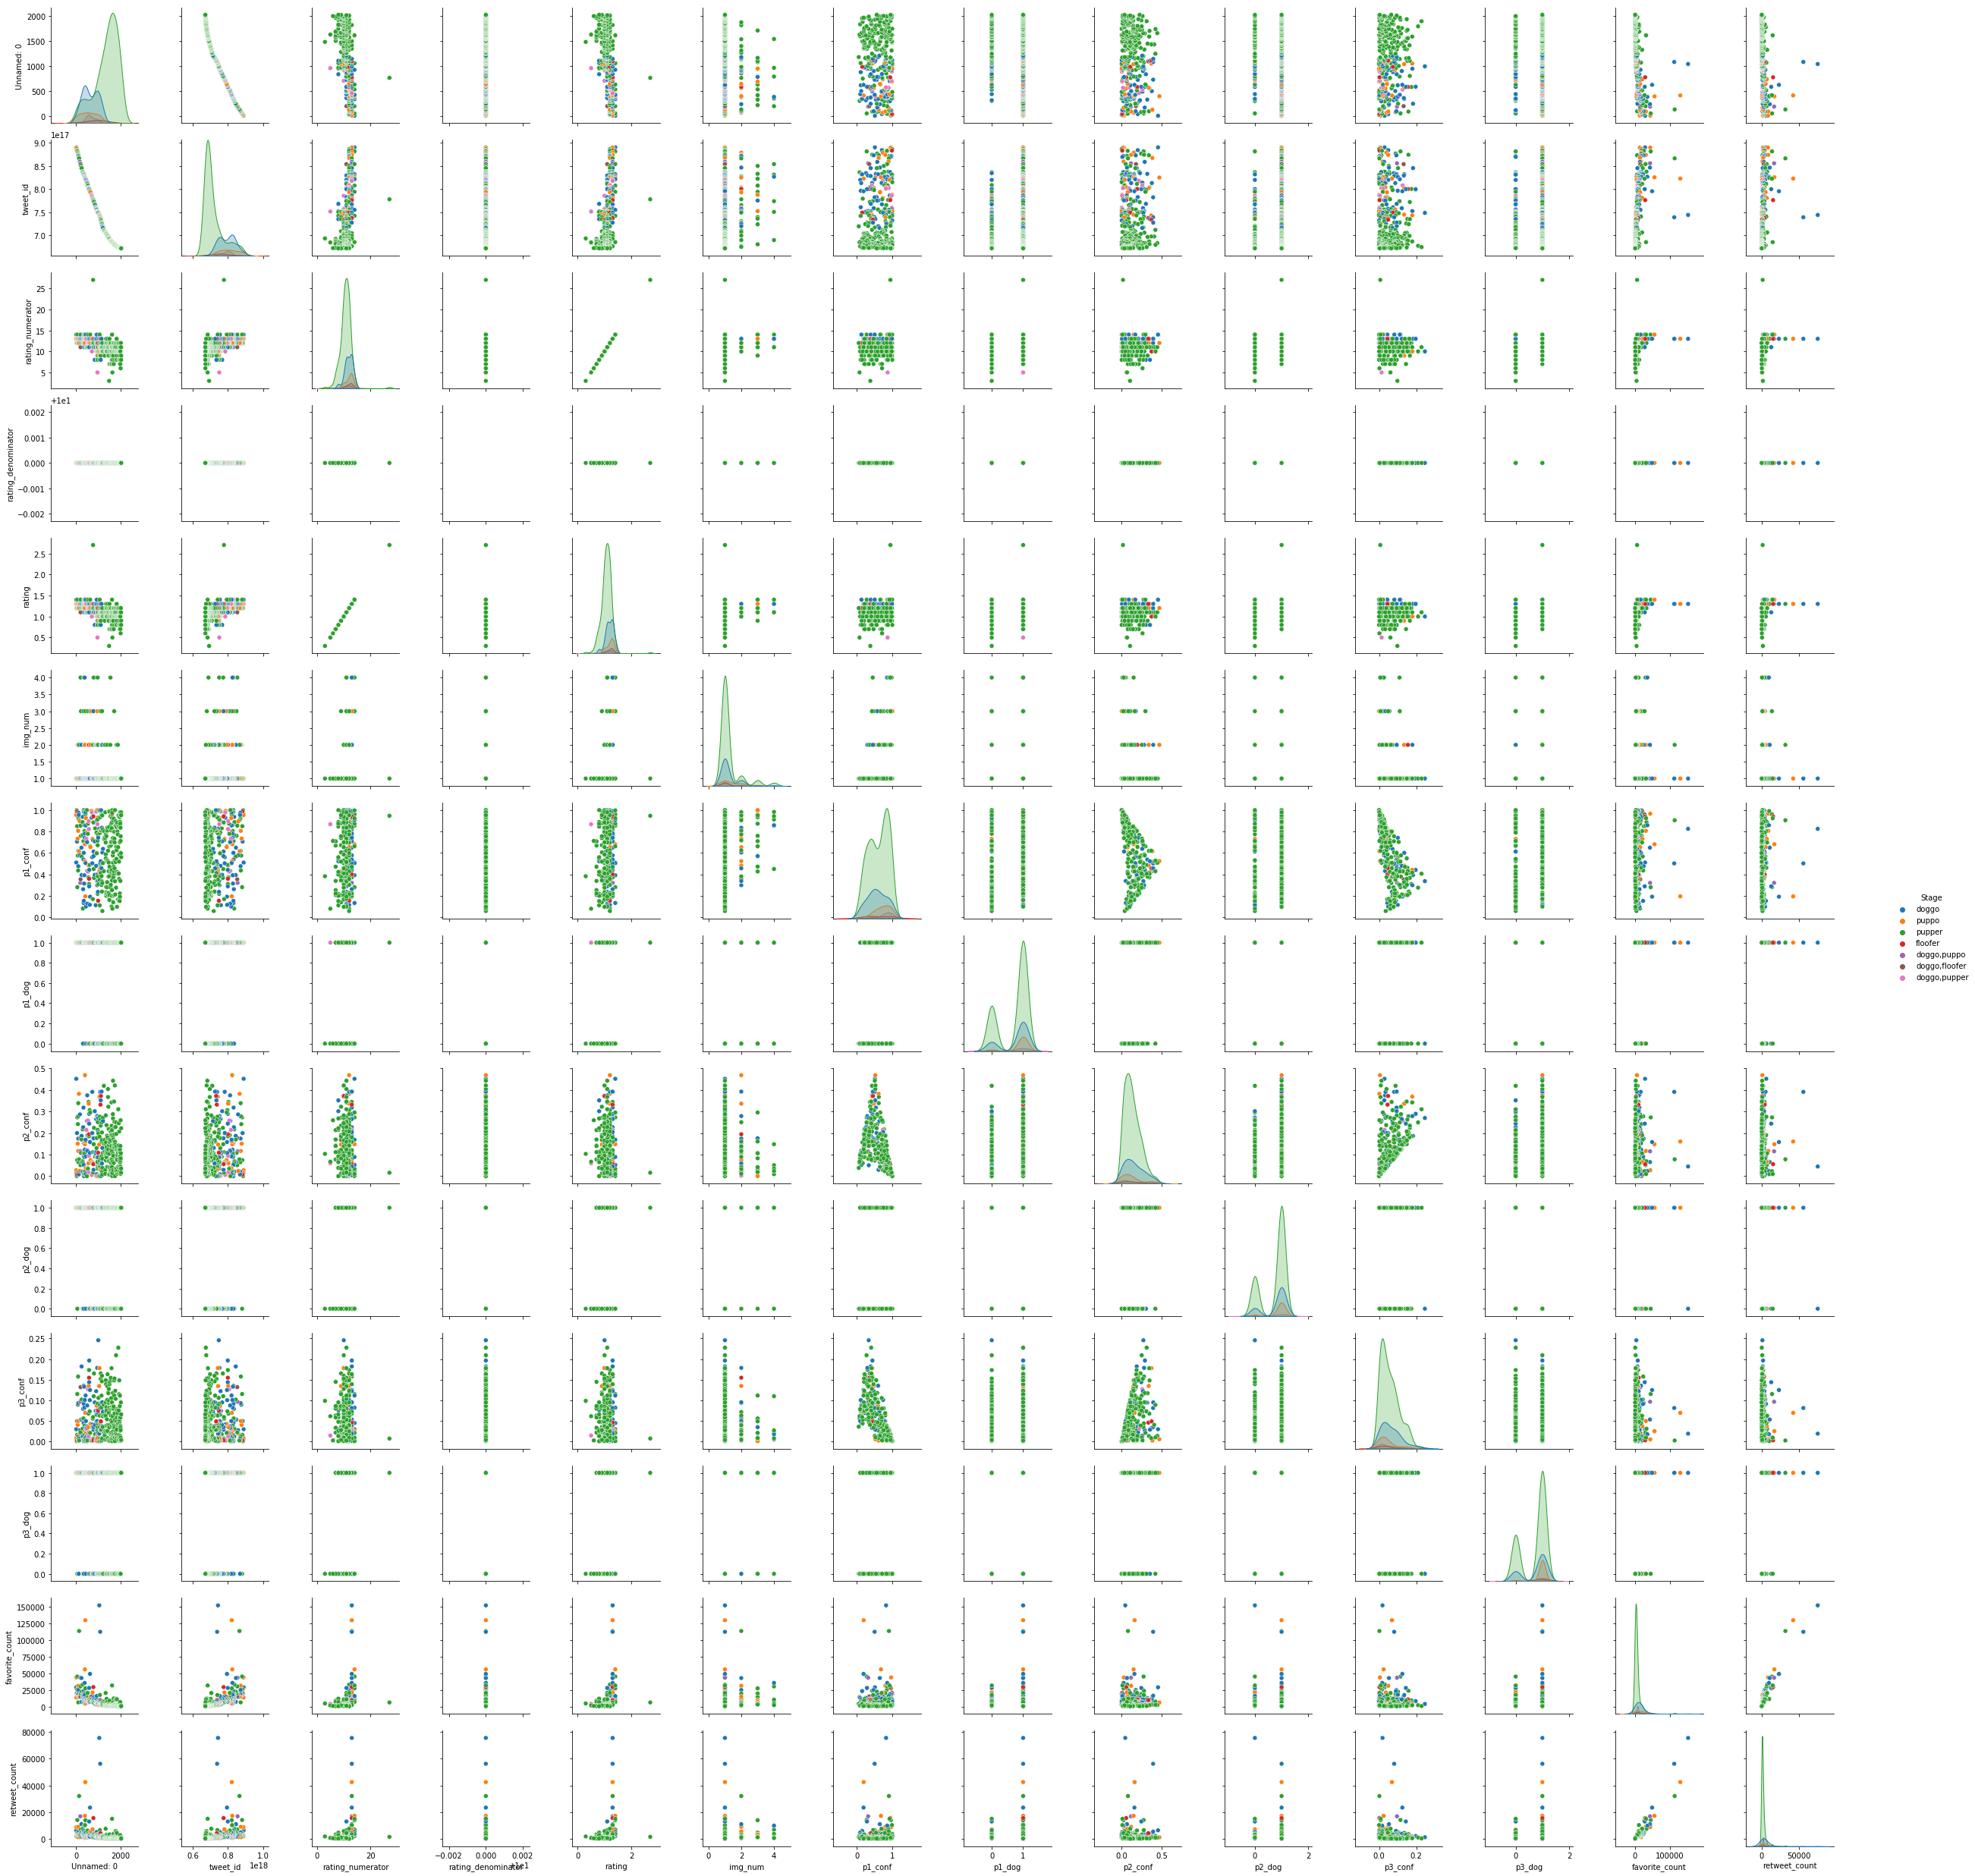

In [77]:
#https://seaborn.pydata.org/generated/seaborn.countplot.html
sns.pairplot(df, hue='Stage');

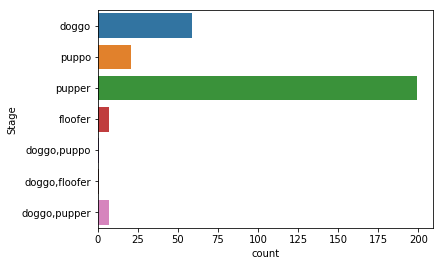

In [78]:
#https://stackoverflow.com/questions/48043365/how-to-improve-this-seaborn-countplot
g=sns.countplot(y="Stage", data=df);
g.set_yticklabels(g.get_yticklabels(),rotation=0);

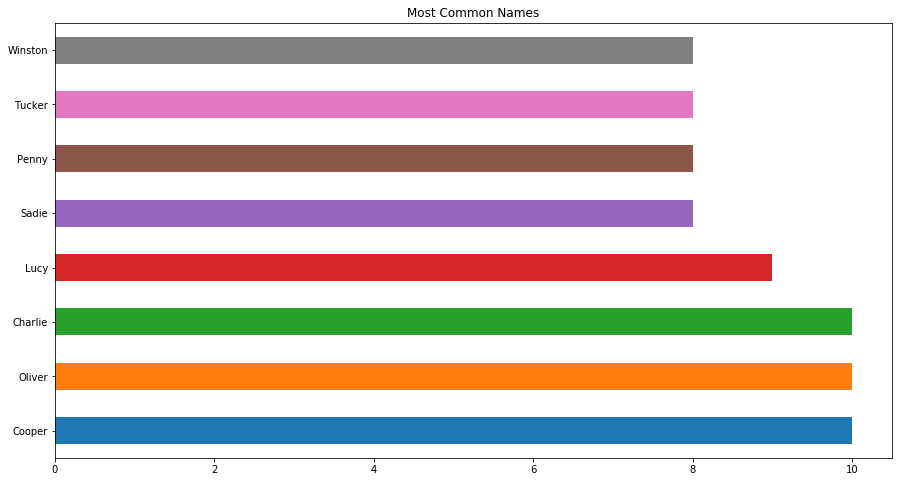

In [79]:
df.name.value_counts()[2:10].plot.barh( figsize=(15,8), title='Most Common Names')

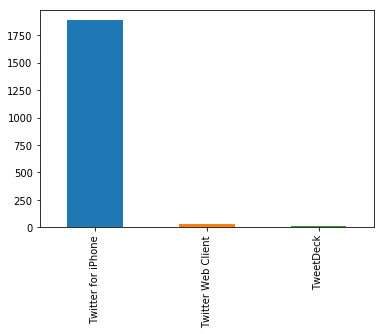

In [80]:
ax = df['source'].value_counts().plot(kind='bar')

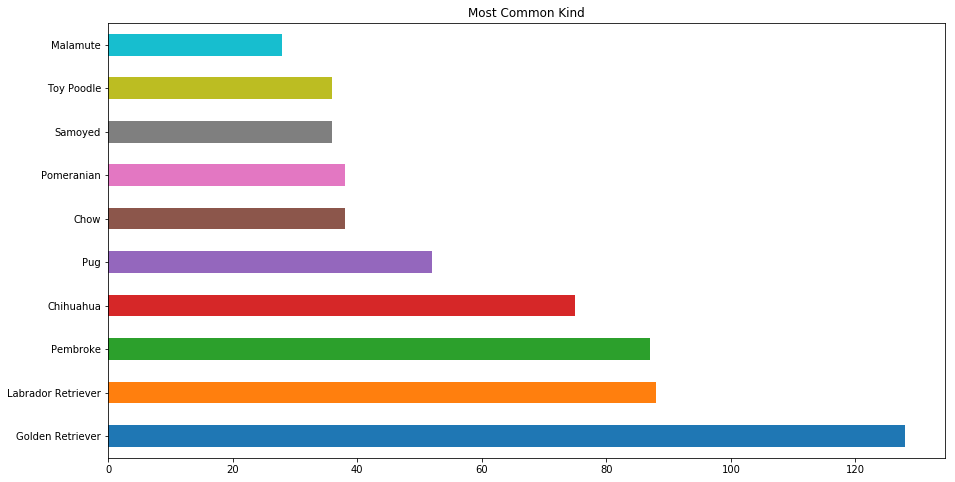

In [81]:
df.p1.value_counts()[0:10].plot.barh( figsize=(15,8), title='Most Common Kind')

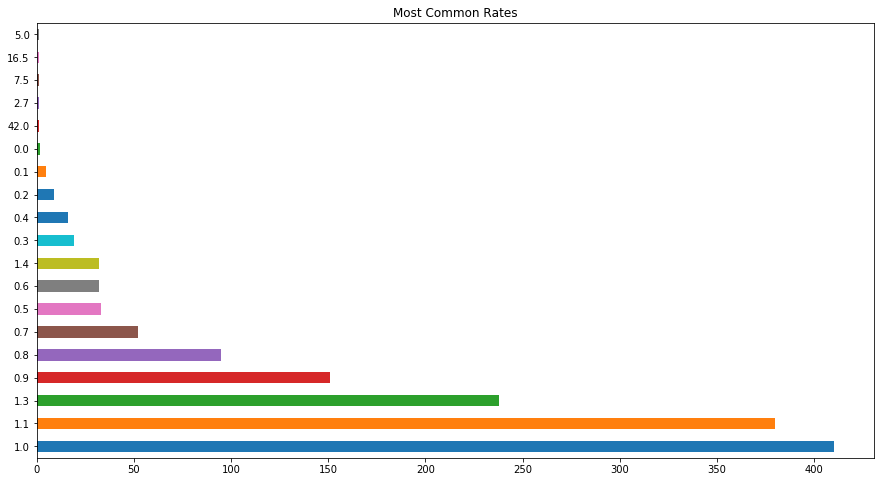

In [82]:
df.rating.value_counts()[1:5].plot.barh( figsize=(15,8), title='Most Common Rates')

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


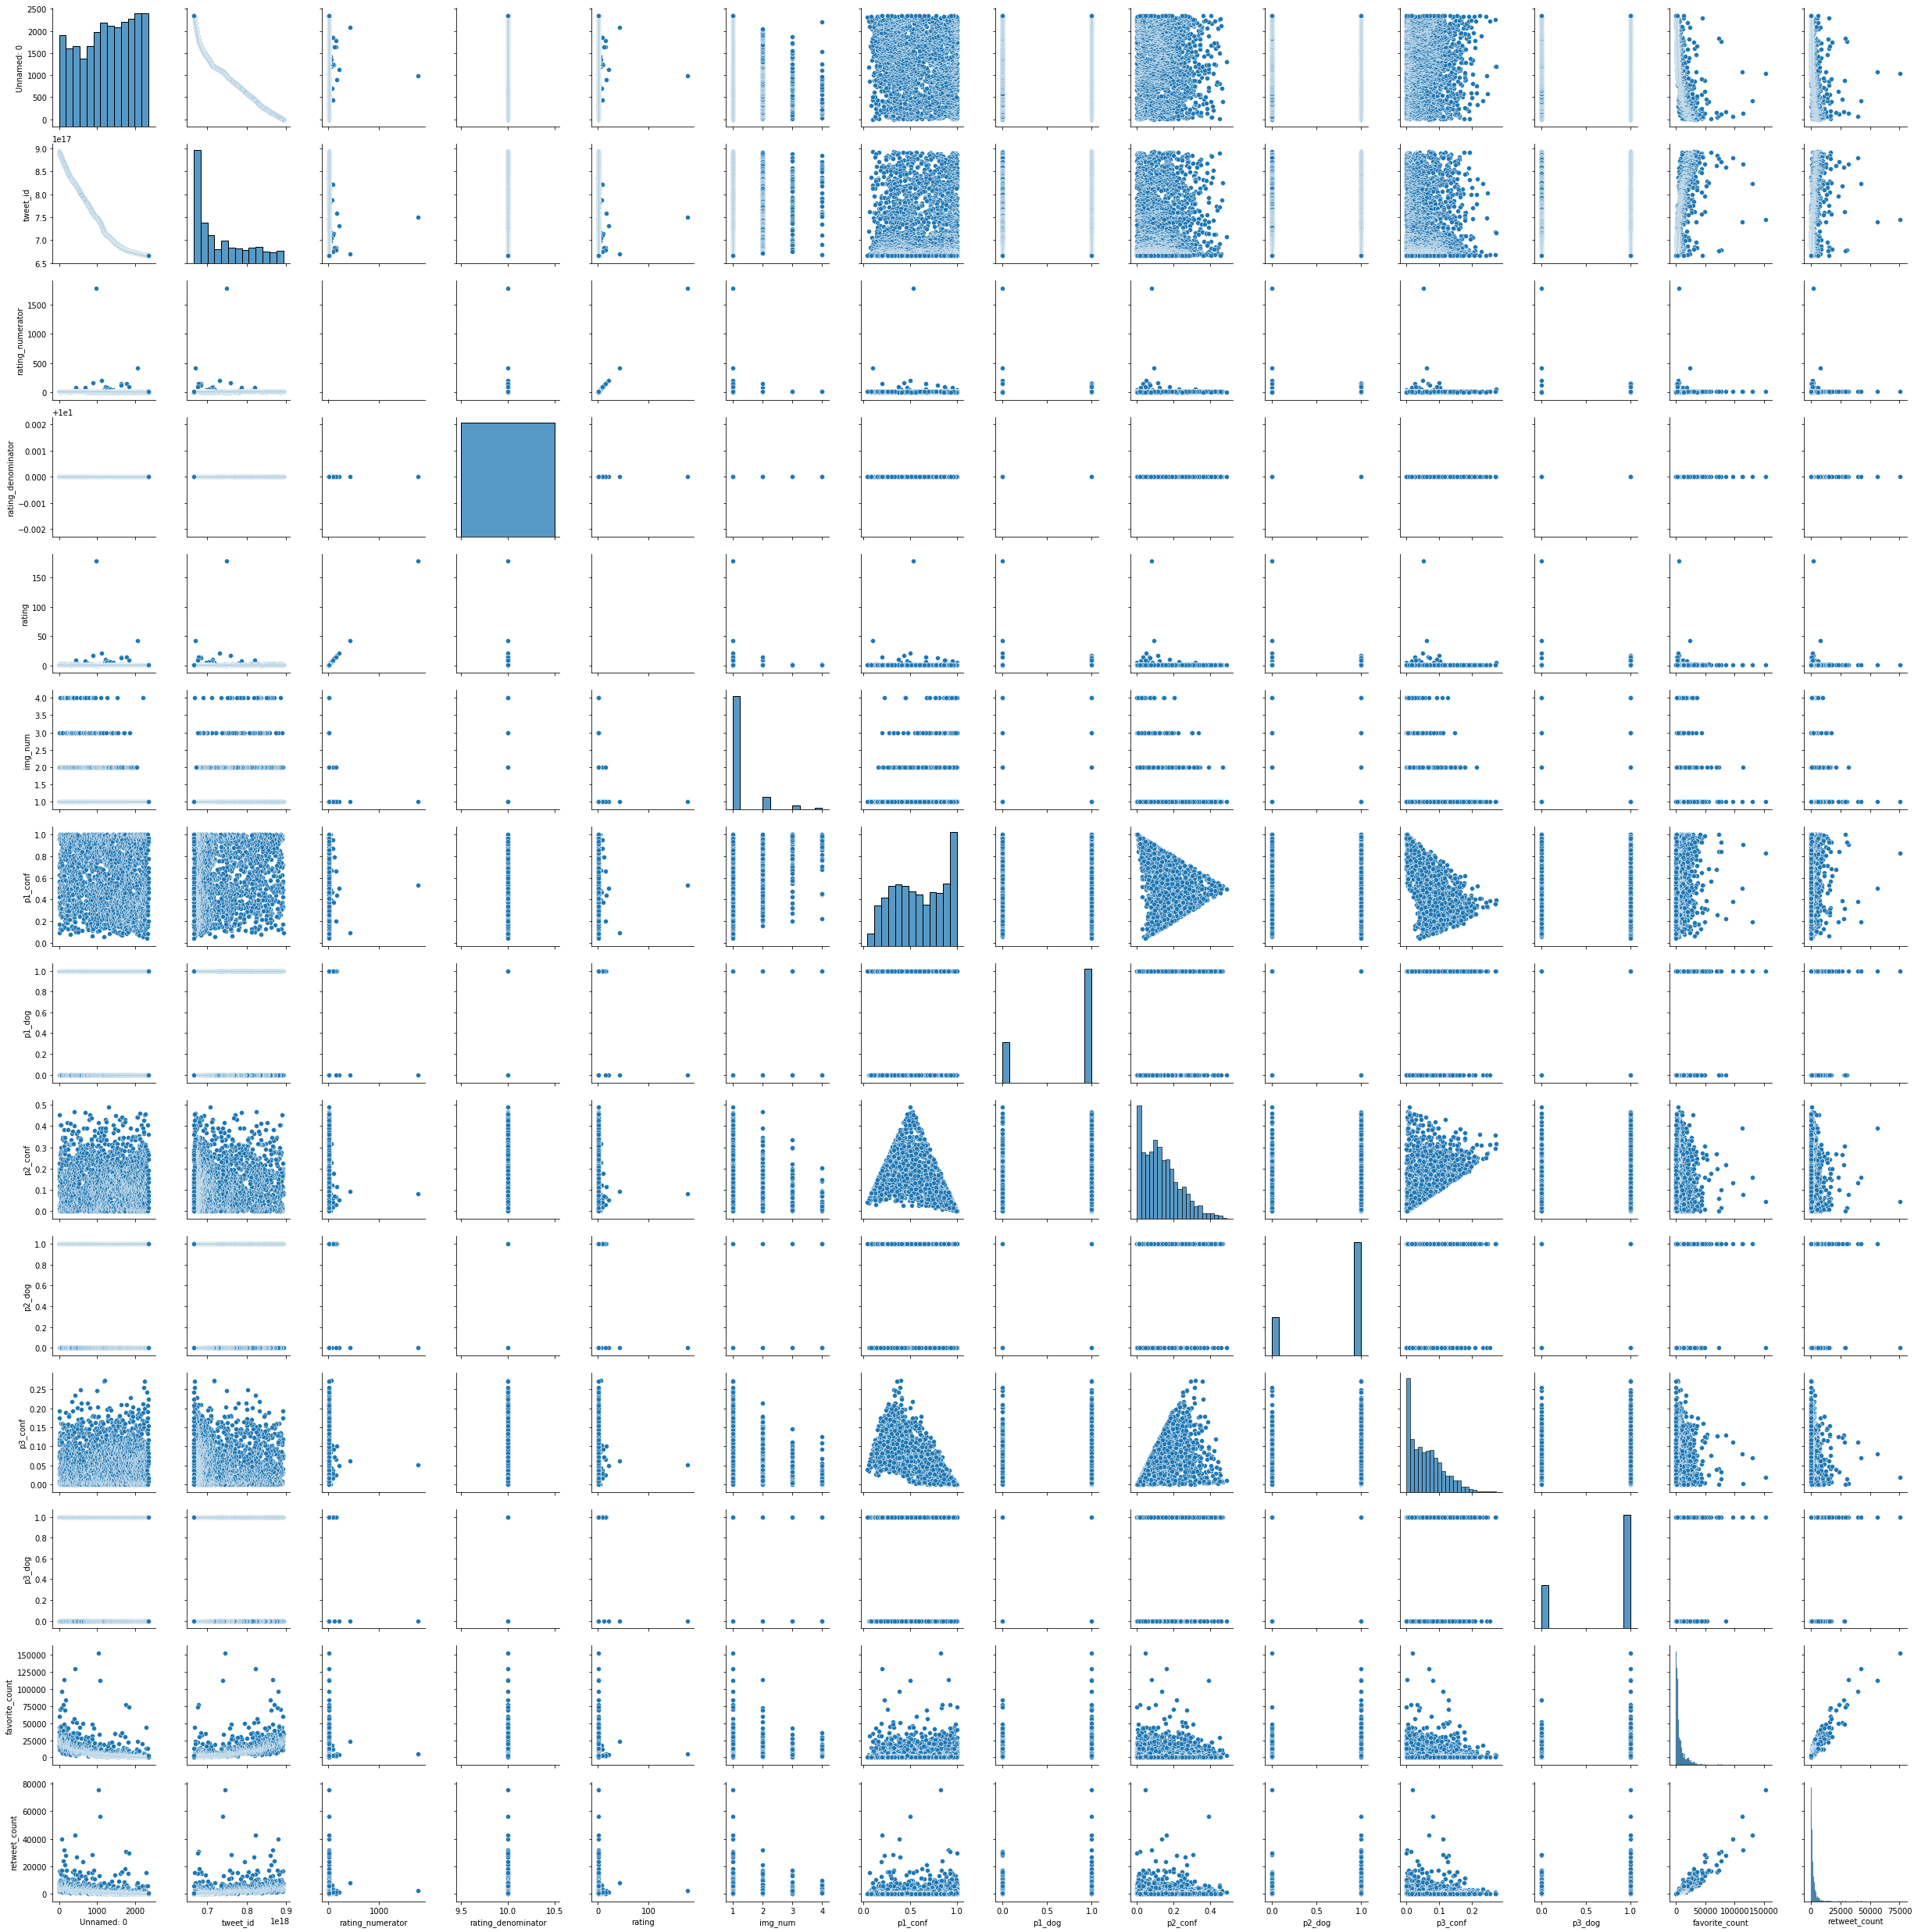

In [83]:
sns.pairplot(df);